# Airplane fare prediction project

First of all we import the library we could use inside our projects. Especially pandas since it is fundamental for our project.

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

We import the dataset from the csv and we analyze how it is composed roughly by looking at the first observations

In [27]:
df = pd.read_csv("C:/Users/leona/LUISS/Machine learning/flight_dataset.csv", sep = ",")
df.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Data cleaning and EDA

The dataset given to us had 0 null values, 0 duplicates and only two useless variables that are unnamed: 0 (just a column of numbers and flight that is a unique code for every flight

In [28]:
df.duplicated().any()

False

In [29]:
df.isna().sum()

df.drop("Unnamed: 0", axis = 1, inplace = True)
df.flight.unique().size #not unique --> encoding
df.drop("flight", axis = 1, inplace = True)

In [55]:
df.describe(include= "all")

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [71]:
df_columns = df.columns.tolist()
categorical_columns = [elem for elem in df_columns if elem not in ["duration", "days_left", "price"]]
numerical_columns = [elem for elem in df_columns if elem in ["duration", "days_left", "price"]]

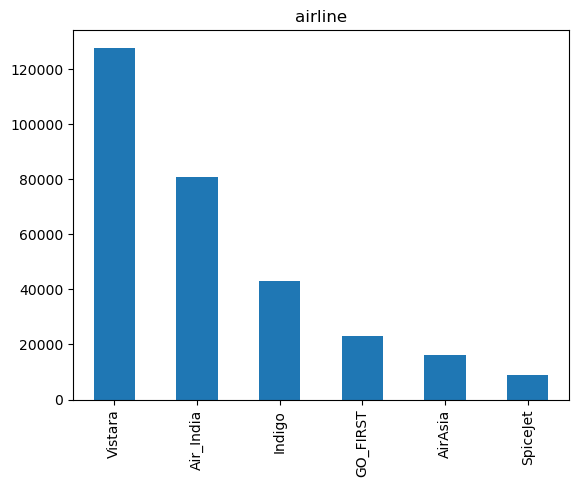

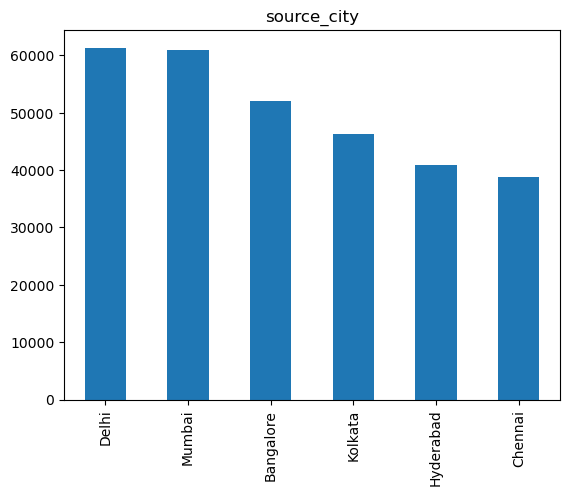

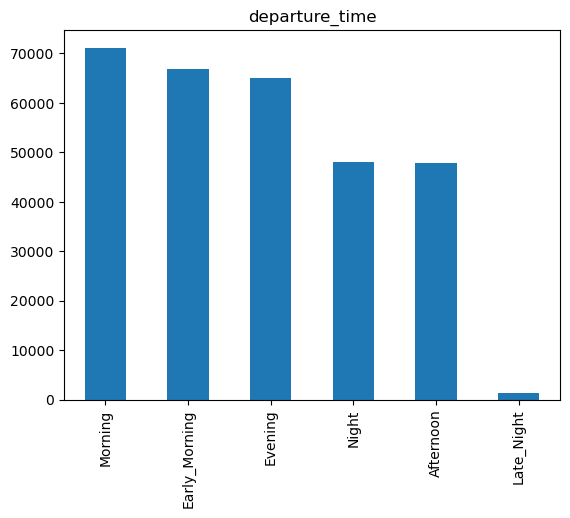

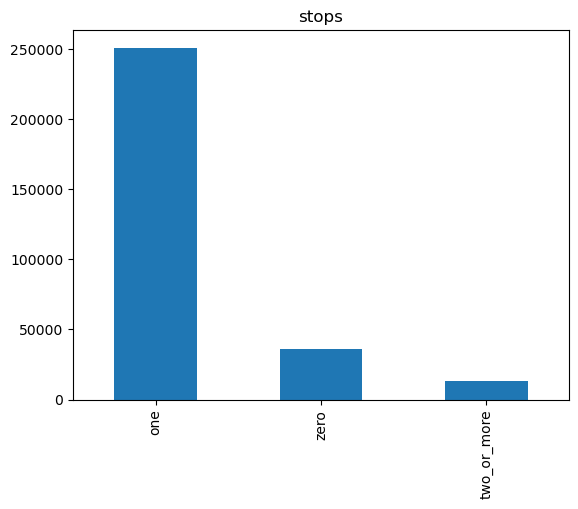

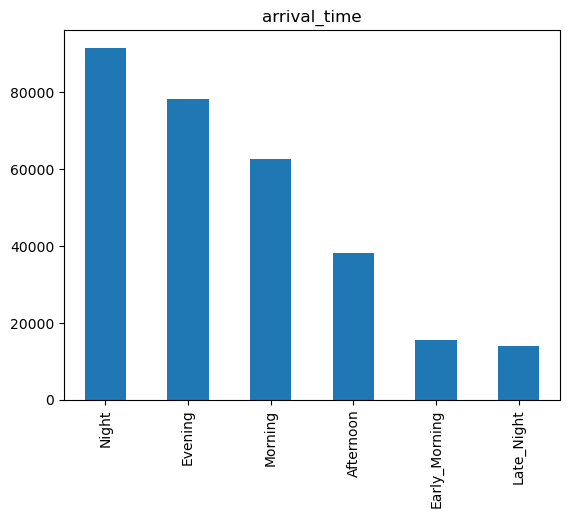

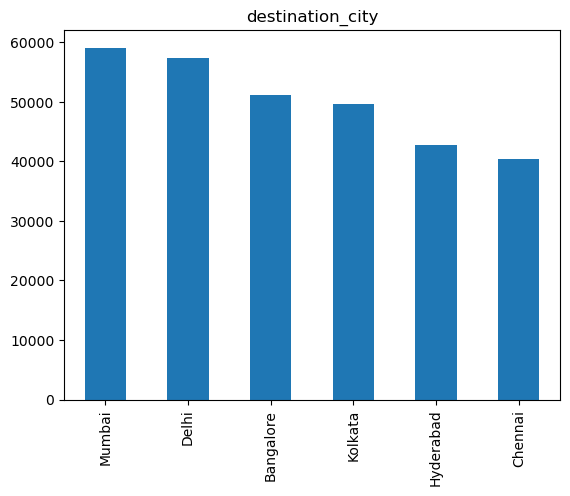

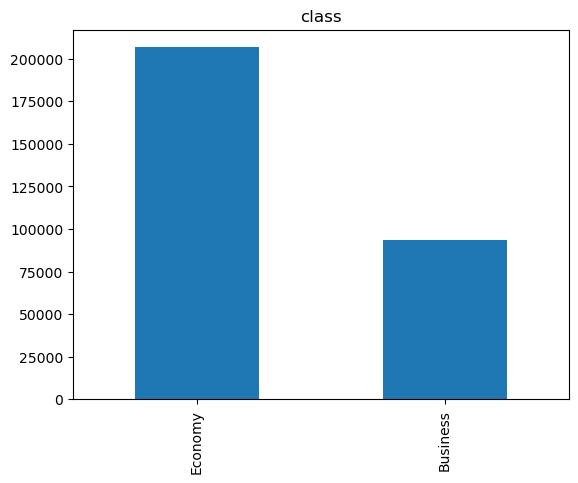

In [66]:
for column in categorical_columns:
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()

array([[<AxesSubplot: title={'center': 'duration'}>,
        <AxesSubplot: title={'center': 'days_left'}>],
       [<AxesSubplot: title={'center': 'price'}>, <AxesSubplot: >]],
      dtype=object)

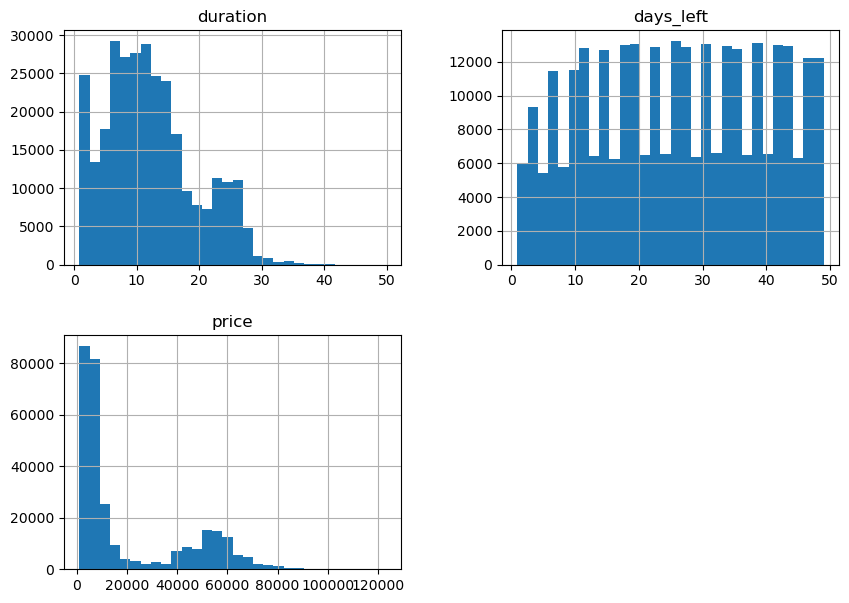

In [67]:
df[numerical_columns].hist(bins=30, figsize=(10, 7))

In [160]:
categorical_columns


['airline',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

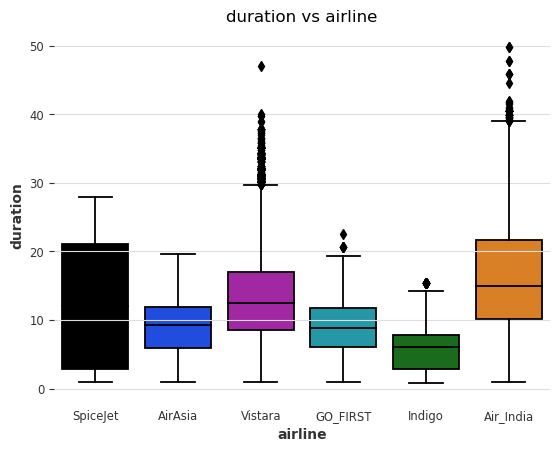

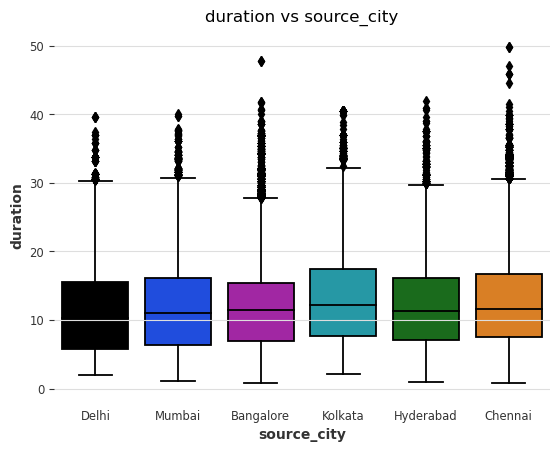

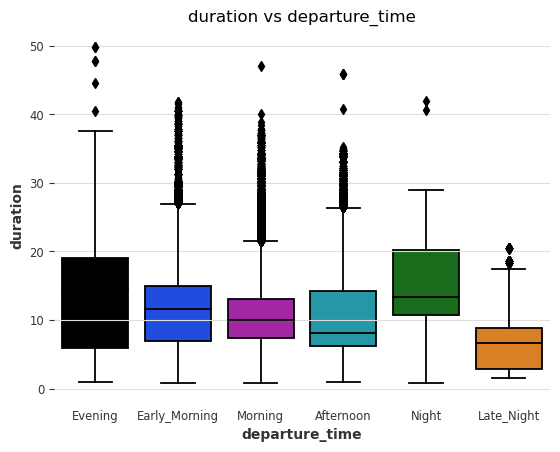

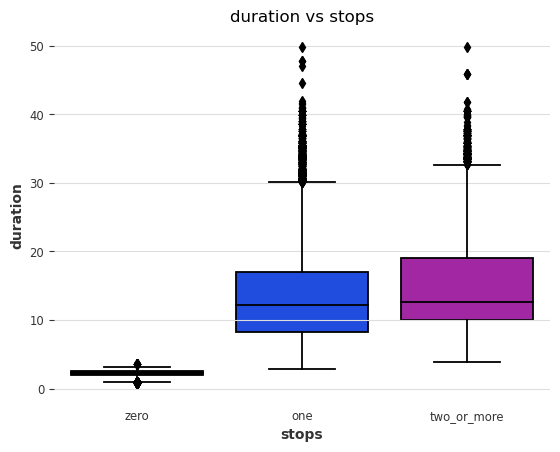

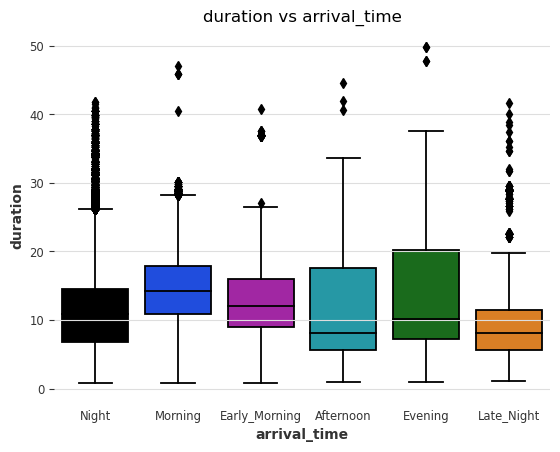

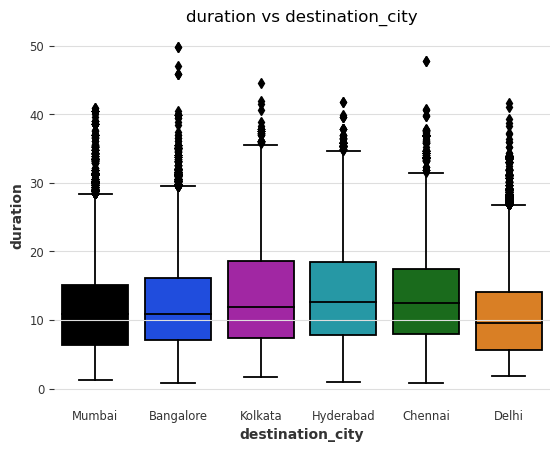

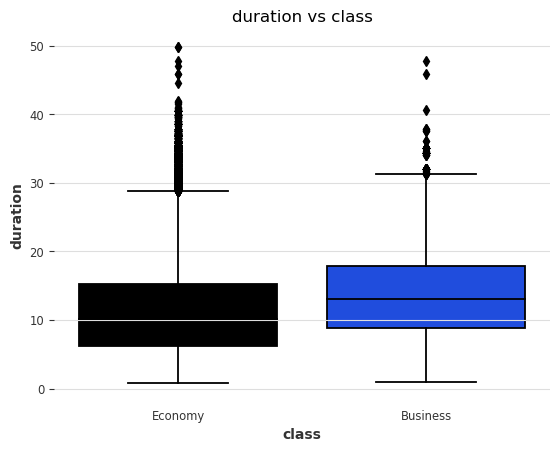

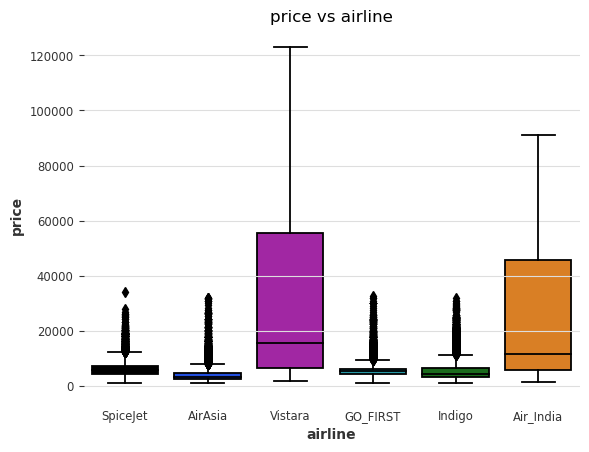

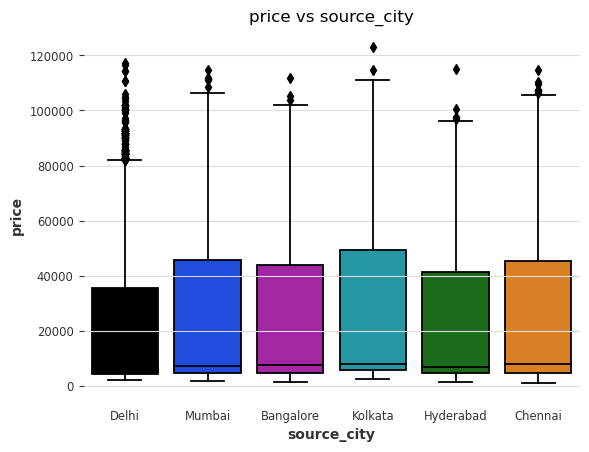

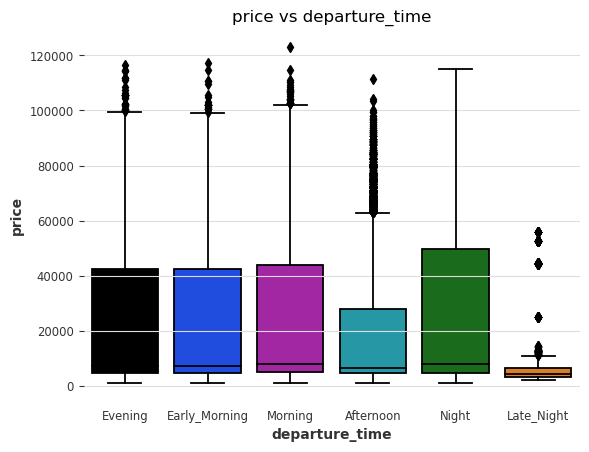

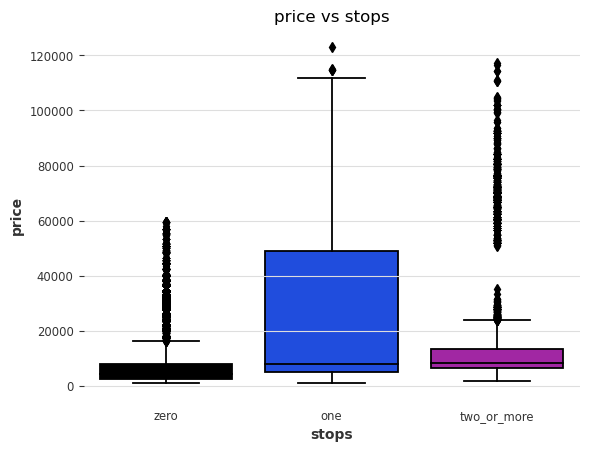

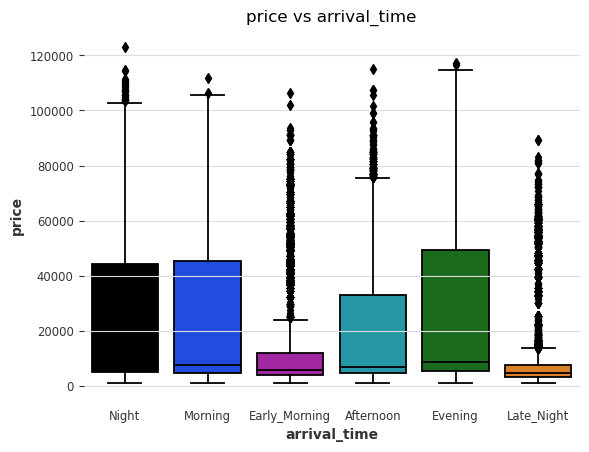

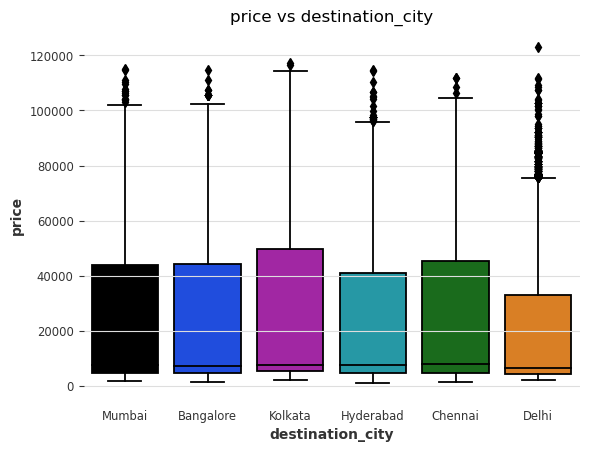

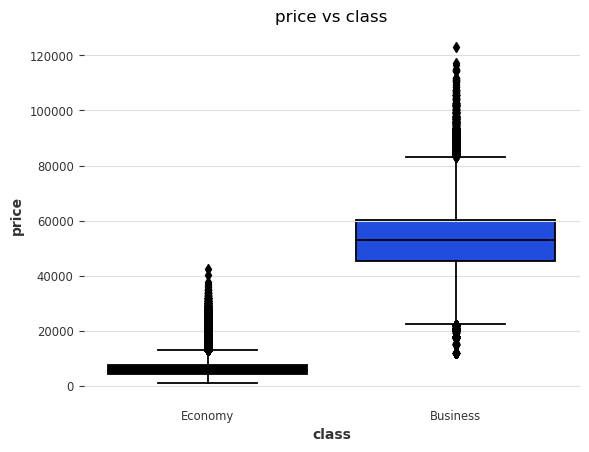

In [162]:
numerical_columns.remove("days_left")
for num_var in numerical_columns:
    for cat_var in categorical_columns:
        sns.boxplot(x=cat_var, y=num_var, data=df)
        plt.title(f'{num_var} vs {cat_var}')
        plt.show()

## Preprocessing

We encode the categorical variables as dummies to let them be understood better by the algorithms and then we create a df with encoded variables and the three continuous variables. We do this to find the correlation between the predictors and the response variable that is price. From the correlation matrix we can see that trivially price is really correlated with the class of flight.

In [30]:
cat_vars = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

df_encoded = pd.get_dummies(df, columns= cat_vars, drop_first = True)

In [31]:
df_concat = pd.concat([df, df_encoded], axis=1)

In [32]:
list_cat = list(df_encoded.columns)

corr_matrix = df_encoded.corr()

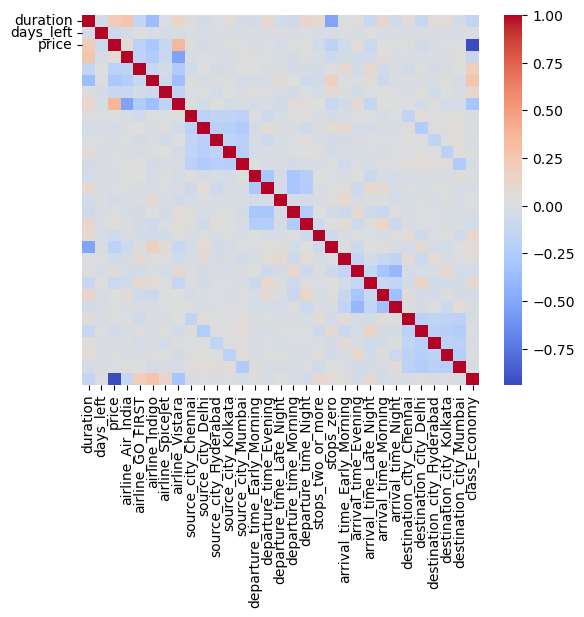

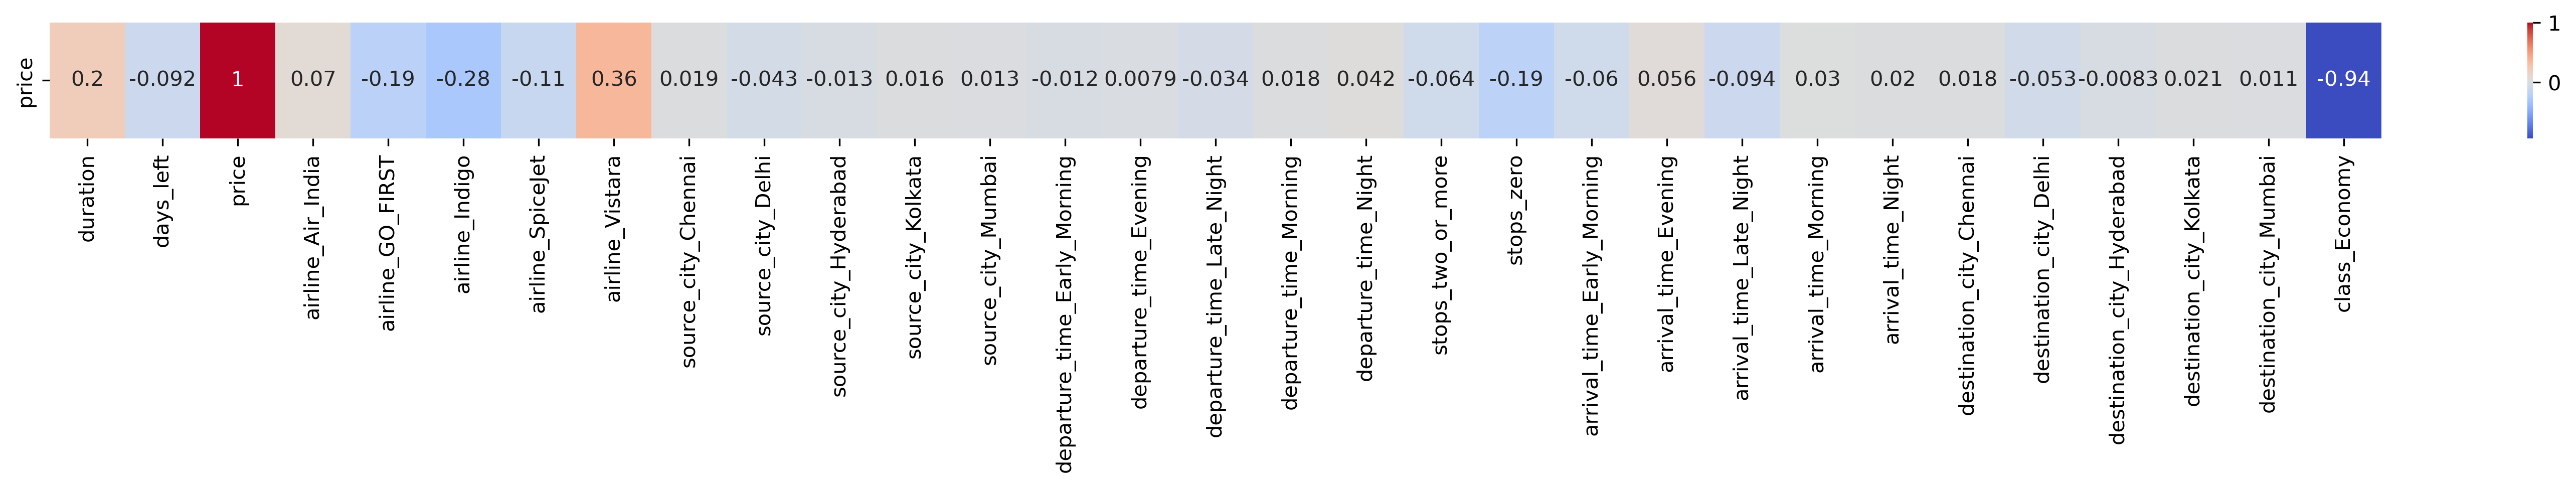

In [33]:
sns.heatmap(corr_matrix, cmap='coolwarm', xticklabels=list_cat, annot = False, yticklabels=['duration', 'days_left', 'price'])

corr_matrix_price = corr_matrix.reset_index()

corr_matrix_price = corr_matrix_price[corr_matrix_price["index"]=="price"]

corr_matrix_price.drop("index", axis = 1, inplace = True)


plt.figure(figsize=(25, 1), dpi = 300)  # set the size of the figure
sns.heatmap(corr_matrix_price, cmap='coolwarm', xticklabels=list_cat, annot=True, yticklabels=['price'])
plt.show()  # display the plot

it is important to keep in mind that correlation does not necessarily imply causation, and the results of such an analysis should be interpreted with caution. 

## Train test split

In [34]:
X = df_encoded.iloc[:, df_encoded.columns != 'price']

y = df_encoded.iloc[:,df_encoded.columns == "price"].values.ravel()

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_validation, y_train, y_val = train_test_split(X, y, test_size = 0.2)

X.dtypes

duration                        float64
days_left                         int64
airline_Air_India                 uint8
airline_GO_FIRST                  uint8
airline_Indigo                    uint8
airline_SpiceJet                  uint8
airline_Vistara                   uint8
source_city_Chennai               uint8
source_city_Delhi                 uint8
source_city_Hyderabad             uint8
source_city_Kolkata               uint8
source_city_Mumbai                uint8
departure_time_Early_Morning      uint8
departure_time_Evening            uint8
departure_time_Late_Night         uint8
departure_time_Morning            uint8
departure_time_Night              uint8
stops_two_or_more                 uint8
stops_zero                        uint8
arrival_time_Early_Morning        uint8
arrival_time_Evening              uint8
arrival_time_Late_Night           uint8
arrival_time_Morning              uint8
arrival_time_Night                uint8
destination_city_Chennai          uint8


In [37]:
list_ct = ["duration", "days_left"]

mergecol = [i for i in range(1, len(X_train)+1)]
mergecoltest = [el for el in range(1, len(X_validation)+1)]

X_train_num = X_train[list_ct]

X_val_num = X_validation[list_ct]

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()

X_train_num_scaled = pd.DataFrame(sc.fit_transform(X_train_num), columns = list_ct)
X_val_num_scaled = pd.DataFrame(sc.transform(X_val_num), columns = list_ct)

In [40]:
X_train_num_scaled["merge"] = mergecol
X_train["merge"] = mergecol

X_train_scaled = pd.merge(X_train, X_train_num_scaled, on = "merge")

X_train_scaled.drop(["duration_x", "days_left_x", "merge"], axis = 1, inplace = True)

X_validation["merge"] = mergecoltest
X_val_num_scaled["merge"] = mergecoltest

X_val_scaled = pd.merge(X_validation, X_val_num_scaled, on = "merge")

X_val_scaled.drop(["duration_x", "days_left_x", "merge"], axis = 1, inplace = True)

### Box cox transformation for linear regression

In [41]:
from scipy import stats

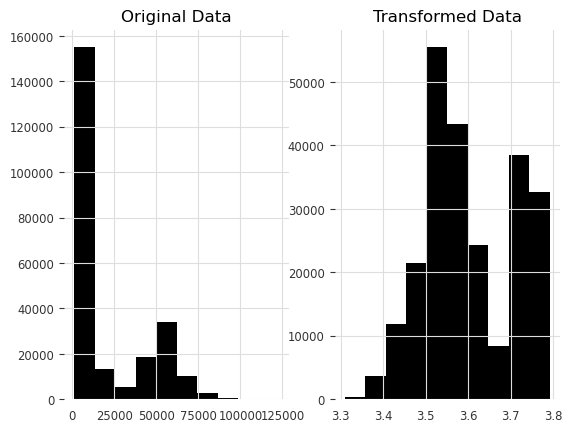

-0.24959009484474493


In [164]:
y_train_linear, lambda_ = stats.boxcox(y_train)
y_val_linear = stats.boxcox(y_val, lambda_)


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(y_train, bins=10)
ax1.set_title("Original Data")
ax2.hist(y_train_linear, bins=10)
ax2.set_title("Transformed Data")
plt.show()

print(lambda_)

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [44]:
selector = SelectKBest(f_regression, k=5)

selector.fit(X_train_scaled, y_train.ravel())

selected_features_indices = selector.get_support(indices=True)

selected_features_names = list(X_train_scaled.columns[selected_features_indices])

print("Selected features:", selected_features_names)

Selected features: ['airline_GO_FIRST', 'airline_Indigo', 'airline_Vistara', 'class_Economy', 'duration_y']


Also if these are the best 5 we want to mantain all the variables to not lose information for our models

### Import useful libraries for the evaluation and gridsearch

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

### Linear regression

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
lm = LinearRegression()

lm_fit = lm.fit(X_train_scaled, y_train_linear)
lm_pred = lm_fit.predict(X_val_scaled)

lmr2 = r2_score(y_val_linear, lm_pred)
rmse_lm = np.sqrt(mean_squared_error(y_val_linear, lm_pred))

In [127]:
data_perf = pd.DataFrame(columns = ["Model", "R2", "RMSE"])

In [128]:
data_perf.loc[0] = ["linear model", lmr2, rmse_lm]
data_perf

,Model,R2,RMSE
0,linear model,0.880322,0.036513


### Random Forest

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [131]:
rfr_rand = RandomForestRegressor(n_estimators = 300)

rfr_grid_rand = rfr_rand.fit(X_train_scaled, y_train.ravel())

y_pred_rand = rfr_grid_rand.predict(X_val_scaled)

r2_rand = r2_score(y_val, y_pred_rand)

rmse_rand = np.sqrt(mean_squared_error(y_val, y_pred_rand))

In [132]:
data_perf.loc[1] = ["random forest", r2_rand, rmse_rand]
data_perf

,Model,R2,RMSE
0,linear model,0.880322,0.036513
1,random forest,0.985222,2761.451831


### XGBoost with optuna hyperparameters tuning

In [115]:
import xgboost as xgb
import optuna

In [116]:
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dval = xgb.DMatrix(X_val_scaled, label=y_val)

In [26]:
def objective(trial):
    # Suggest hyperparameters for the trial
    params = {
        'objective': 'reg:squarederror',
        'booster': trial.suggest_categorical('booster', ['gbtree', 'dart']),
        'lambda': trial.suggest_float('lambda', 0.001, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 0.001, 1.0, log=True),
        'eta': trial.suggest_float('eta', 0.001, 0.4, log=True),
    }
    
    if params['booster'] in ['gbtree', 'dart']:
        params['subsample'] = trial.suggest_float('subsample', 0.1, 1.0)
        params['colsample_bytree'] = trial.suggest_float('colsample_bytree', 0.1, 1.0)
        params['max_depth'] = trial.suggest_int('max_depth', 1, 7)
        params['min_child_weight'] = trial.suggest_int('min_child_weight', 1, 7)
        params['grow_policy'] = trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide'])

    if params['booster'] == 'dart':
        params['sample_type'] = trial.suggest_categorical('sample_type', ['uniform', 'weighted'])
        params['normalize_type'] = trial.suggest_categorical('normalize_type', ['tree', 'forest'])
        params['rate_drop'] = trial.suggest_float('rate_drop', 1e-8, 1.0, log=True)
        params['skip_drop'] = trial.suggest_float('skip_drop', 1e-8, 1.0, log=True)

    bst = xgb.train(params, dtrain, num_boost_round=200)
    preds = bst.predict(dval)
    r2 = r2_score(y_val, preds)
    return r2


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=300, timeout=60000)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2023-05-14 11:18:03,355] A new study created in memory with name: no-name-fab9540c-5543-4d27-bc1b-dc5cc257a6ad
[I 2023-05-14 11:18:13,485] Trial 0 finished with value: 0.19758386684309392 and parameters: {'booster': 'gbtree', 'lambda': 0.5073377446173192, 'alpha': 0.011805042779577814, 'eta': 0.007191381587231132, 'subsample': 0.6798754972192672, 'colsample_bytree': 0.1239880871083731, 'max_depth': 3, 'min_child_weight': 1, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.19758386684309392.
[I 2023-05-14 11:22:27,318] Trial 1 finished with value: 0.6643985223981768 and parameters: {'booster': 'dart', 'lambda': 0.0022374232872987955, 'alpha': 0.19279676630651701, 'eta': 0.0049560390317467, 'subsample': 0.44316998751697856, 'colsample_bytree': 0.8604085657005504, 'max_depth': 7, 'min_child_weight': 1, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0003044641710389492, 'skip_drop': 0.6324929292344277}. Best is trial 1 with val

Number of finished trials:  300
Best trial:
  Value: 0.9856524485769985
  Params: 
    booster: dart
    lambda: 0.7136748855275525
    alpha: 0.06443875762907948
    eta: 0.39929292183233744
    subsample: 0.9999250148002398
    colsample_bytree: 0.9987868574564349
    max_depth: 7
    min_child_weight: 5
    grow_policy: lossguide
    sample_type: weighted
    normalize_type: tree
    rate_drop: 7.88757460538169e-08
    skip_drop: 1.3265543872972848e-05


In [118]:
# Make predictions on the test set
params = {
    "booster": "dart",
    "lambda": 0.7136748855275525,
    "alpha": 0.06443875762907948,
    "eta": 0.39929292183233744,
    "subsample": 0.9999250148002398,
    "colsample_bytree": 0.9987868574564349,
    "max_depth": 7,
    "min_child_weight": 5,
    "grow_policy": "lossguide",
    "sample_type": "weighted",
    "normalize_type": "tree",
    "rate_drop": 7.88757460538169e-08,
    "skip_drop": 1.3265543872972848e-05
}

# Initialize a new XGBoost model with the best hyperparameters
model_xgb = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dval, 'validation')])

# Make predictions on validation data using the best model
preds = model_xgb.predict(dval)

[0]	validation-rmse:19015.71894
[1]	validation-rmse:12098.95313
[2]	validation-rmse:8207.31495
[3]	validation-rmse:6199.00398
[4]	validation-rmse:5227.53080
[5]	validation-rmse:4792.13136
[6]	validation-rmse:4564.32318
[7]	validation-rmse:4412.78949
[8]	validation-rmse:4332.71024
[9]	validation-rmse:4292.17112
[10]	validation-rmse:4229.10961
[11]	validation-rmse:4211.42678
[12]	validation-rmse:4150.28532
[13]	validation-rmse:4087.96515
[14]	validation-rmse:4027.09944
[15]	validation-rmse:4015.62152
[16]	validation-rmse:3985.74367
[17]	validation-rmse:3930.29700
[18]	validation-rmse:3923.76240
[19]	validation-rmse:3873.71180
[20]	validation-rmse:3852.48503
[21]	validation-rmse:3812.10368
[22]	validation-rmse:3802.06101
[23]	validation-rmse:3781.56539
[24]	validation-rmse:3751.26679
[25]	validation-rmse:3739.02470
[26]	validation-rmse:3718.06460
[27]	validation-rmse:3688.46441
[28]	validation-rmse:3676.22921
[29]	validation-rmse:3654.95449
[30]	validation-rmse:3641.19561
[31]	validation-

In [123]:
r2_fin = r2_score(y_val, preds)
rmse_fin = mean_squared_error(y_val, preds, squared = False)

To see if it is overfitting we plot the residuals

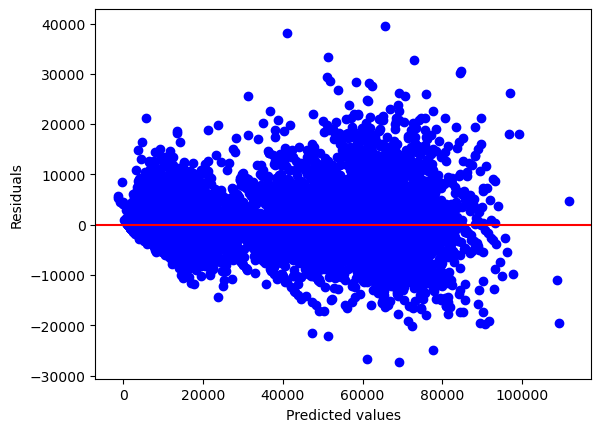

In [27]:
residuals = y_val.ravel() - preds.ravel()

# Plot the residuals against the predicted values
plt.scatter(preds, residuals, color = "blue")
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

In [133]:
data_perf.loc[2] = ["xgboost dmatrices", r2_fin, rmse_fin]
data_perf

,Model,R2,RMSE
0,linear model,0.880322,0.036513
1,random forest,0.985222,2761.451831
2,xgboost dmatrices,0.988026,2485.678683


### Histgradient

In [119]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [120]:
gradient_h = HistGradientBoostingRegressor()

hgb_fitt = gradient_h.fit(X_train_scaled, y_train)

y_pred_hist = hgb_fitt.predict(X_val_scaled)

r2_hist = r2_score(y_val, y_pred_hist)

rmse_hist = np.sqrt(mean_squared_error(y_val, y_pred_hist))

In [134]:
data_perf.loc[3] = ["histgradient", r2_hist, rmse_hist]
data_perf

,Model,R2,RMSE
0,linear model,0.880322,0.036513
1,random forest,0.985222,2761.451831
2,xgboost dmatrices,0.988026,2485.678683
3,histgradient,0.969830,3945.578529


### Catboost

In [122]:
import catboost as ctb

In [72]:
X_cat = df.iloc[:, df.columns != 'price']

y_cat = df.iloc[:,df.columns == "price"].values.ravel()

X_train_cat, X_val_cat, y_train_cat, y_val_cat = train_test_split(X_cat, y_cat, test_size = 0.2)

In [95]:
model_CBC = ctb.CatBoostRegressor(iterations=5000, loss_function = 'RMSE', cat_features= categorical_columns)
model_CBC.fit(X_train_cat, y_train_cat.ravel())
print(model_CBC)

Learning rate set to 0.026304
0:	learn: 22139.5174523	total: 184ms	remaining: 15m 19s
1:	learn: 21603.5736873	total: 318ms	remaining: 13m 15s
2:	learn: 21081.4732399	total: 556ms	remaining: 15m 26s
3:	learn: 20580.5040333	total: 645ms	remaining: 13m 25s
4:	learn: 20087.8168259	total: 832ms	remaining: 13m 50s
5:	learn: 19610.8196654	total: 1.02s	remaining: 14m 13s
6:	learn: 19146.3168525	total: 1.17s	remaining: 13m 55s
7:	learn: 18696.4404316	total: 1.38s	remaining: 14m 18s
8:	learn: 18259.9353613	total: 1.49s	remaining: 13m 47s
9:	learn: 17833.5097219	total: 1.72s	remaining: 14m 18s
10:	learn: 17421.3311686	total: 1.84s	remaining: 13m 54s
11:	learn: 17020.6731898	total: 2.04s	remaining: 14m 6s
12:	learn: 16632.3381231	total: 2.26s	remaining: 14m 26s
13:	learn: 16254.7440046	total: 2.47s	remaining: 14m 40s
14:	learn: 15888.4494439	total: 2.69s	remaining: 14m 54s
15:	learn: 15531.9911650	total: 2.88s	remaining: 14m 57s
16:	learn: 15186.1784029	total: 3.06s	remaining: 14m 56s
17:	learn: 1

In [100]:
y_pred_cat = model_CBC.predict(X_val_cat)

r2_cat = r2_score(y_val_cat, y_pred_cat)
rmse_cat = mean_squared_error(y_val_cat, y_pred_cat, squared = False)

In [135]:
data_perf.loc[4] = ["catboost", r2_cat, rmse_cat]
data_perf

,Model,R2,RMSE
0,linear model,0.880322,0.036513
1,random forest,0.985222,2761.451831
2,xgboost dmatrices,0.988026,2485.678683
3,histgradient,0.969830,3945.578529
4,catboost,0.977294,3424.311371


### Neural network with optuna

In [22]:
import torch
import torch.nn as nn

In [23]:
X_train_scaled_tc = X_train_scaled.values
X_val_scaled_tc = X_val_scaled.values

X_train_torch = torch.tensor(X_train_scaled_tc, dtype=torch.float32)
X_val_torch = torch.tensor(X_val_scaled_tc, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
y_val_torch = torch.tensor(y_val, dtype=torch.float32).reshape(-1, 1)

In [49]:
import numpy as np
def objective_neural(trial):

    n_layers = trial.suggest_int('n_layers', 1, 5)
    layers = []
    in_features = 30
    for i in range(n_layers):
        out_features = trial.suggest_int(f'n_units_l{i}', 5, 50)
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.ReLU())
        in_features = out_features
    layers.append(nn.Linear(in_features, 1))
    model = nn.Sequential(*layers)


    lr = trial.suggest_float('lr', 1e-3, 0.1, log=True)

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    num_epochs = 1000
    for epoch in range(num_epochs):
        # Forward pass
        y_pred = model(X_train_torch)
        loss = criterion(y_pred, y_train_torch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on the validation set
    with torch.no_grad():
        y_pred = model(X_val_torch)
        val_loss = criterion(y_pred, y_val_torch)

    return np.sqrt(val_loss.item())

# Run the optimization
study_neural = optuna.create_study(direction='minimize')
study_neural.optimize(objective_neural, n_trials=100)


print("Number of finished trials: ", len(study_neural.trials))
print("Best trial:")
trial_neural = study_neural.best_trial

print("  Value: {}".format(trial_neural.value))
print("  Params: ")
for key, value in trial_neural.params.items():
    print("    {}: {}".format(key, value))

[I 2023-05-16 16:46:13,525] A new study created in memory with name: no-name-5d25bdd1-c643-472f-903c-d86582bd5172
[I 2023-05-16 16:48:11,256] Trial 0 finished with value: 5332.94121475195 and parameters: {'n_layers': 2, 'n_units_l0': 17, 'n_units_l1': 48, 'lr': 0.008198072239396382}. Best is trial 0 with value: 5332.94121475195.
[I 2023-05-16 16:57:01,565] Trial 1 finished with value: 4348.447539064948 and parameters: {'n_layers': 4, 'n_units_l0': 31, 'n_units_l1': 32, 'n_units_l2': 8, 'n_units_l3': 43, 'lr': 0.00960955734296341}. Best is trial 1 with value: 4348.447539064948.
[I 2023-05-16 17:01:50,329] Trial 2 finished with value: 4866.798947973914 and parameters: {'n_layers': 4, 'n_units_l0': 39, 'n_units_l1': 33, 'n_units_l2': 23, 'n_units_l3': 50, 'lr': 0.0024249811560841422}. Best is trial 1 with value: 4348.447539064948.
[I 2023-05-16 17:05:16,534] Trial 3 finished with value: 4981.102086888001 and parameters: {'n_layers': 5, 'n_units_l0': 9, 'n_units_l1': 9, 'n_units_l2': 37, '

Number of finished trials:  50
Best trial:
  Value: 4063.984374969963
  Params: 
    n_layers: 5
    n_units_l0: 46
    n_units_l1: 28
    n_units_l2: 9
    n_units_l3: 20
    n_units_l4: 39
    lr: 0.028259148760729973


In [102]:
model_nn = nn.Sequential(
    nn.Linear(30, 46),
    nn.ReLU(),
    nn.Linear(46, 28),
    nn.ReLU(),
    nn.Linear(28, 9),
    nn.ReLU(),
    nn.Linear(9, 20),
    nn.ReLU(),
    nn.Linear(20, 39),
    nn.ReLU(),
    nn.Linear(39, 1)
)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_nn.parameters(), lr=0.02826)

num_epochs = 5000
for epoch in range(num_epochs):
    # Forward pass
    y_pred_nn = model_nn(X_train_torch)
    loss = criterion(y_pred_nn, y_train_torch)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print the loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, loss: {loss.item():.4f}")


Epoch 10, loss: 944913024.0000
Epoch 20, loss: 581115968.0000
Epoch 30, loss: 492458848.0000
Epoch 40, loss: 392348544.0000
Epoch 50, loss: 296513088.0000
Epoch 60, loss: 170733664.0000
Epoch 70, loss: 45800908.0000
Epoch 80, loss: 36816664.0000
Epoch 90, loss: 31645330.0000
Epoch 100, loss: 29057742.0000
Epoch 110, loss: 27865204.0000
Epoch 120, loss: 27066938.0000
Epoch 130, loss: 26401296.0000
Epoch 140, loss: 25758224.0000
Epoch 150, loss: 25158026.0000
Epoch 160, loss: 24615536.0000
Epoch 170, loss: 24125882.0000
Epoch 180, loss: 23680306.0000
Epoch 190, loss: 23288280.0000
Epoch 200, loss: 22940436.0000
Epoch 210, loss: 22635180.0000
Epoch 220, loss: 22372000.0000
Epoch 230, loss: 22133184.0000
Epoch 240, loss: 21907764.0000
Epoch 250, loss: 21694126.0000
Epoch 260, loss: 21491348.0000
Epoch 270, loss: 21298108.0000
Epoch 280, loss: 21117802.0000
Epoch 290, loss: 20947278.0000
Epoch 300, loss: 20783818.0000
Epoch 310, loss: 20630516.0000
Epoch 320, loss: 20486290.0000
Epoch 330, 

In [112]:
# Evaluate the model on the test set
with torch.no_grad():
    y_pred_nn = model(X_val_torch)
    test_loss = criterion(y_pred_nn, y_val_torch)
    y_pred_nn = y_pred_nn.detach().numpy()

    # Calculate R-squared
    r2_tensor = r2_score(y_val, y_pred_nn)

    print(f"Test loss: {test_loss.item():.4f}")
    print(f"R-squared: {r2_tensor:.4f}")



Test loss: 15864029.0000
R-squared: -0.9779


In [136]:
data_perf.loc[5] = ["neural network", r2tensor, rmse_tensor]
data_perf

,Model,R2,RMSE
0,linear model,0.880322,0.036513
1,random forest,0.985222,2761.451831
2,xgboost dmatrices,0.988026,2485.678683
3,histgradient,0.969830,3945.578529
4,catboost,0.977294,3424.311371
5,neural network,-0.977874,31946.674700
